In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv("Titanic.csv")

In [3]:
#Exercise 1

In [4]:
#Quesiton1
df.set_index('PassengerId', inplace=True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [5]:
#Question2
missing_values = df[['Age', 'Embarked', 'Cabin']].isnull()
missing_values


,Age,Embarked,Cabin
PassengerId,,,
1,False,False,True
2,False,False,False
3,False,False,True
4,False,False,False
5,False,False,True
...,...,...,...
887,False,False,True
888,False,False,False
889,True,False,True


In [6]:
#Question3
obj_and_num = df.select_dtypes(include=['object', 'number'])
obj_and_num.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#Question4
survived = df['Survived'].sum()
tc = df['Survived'].count()
print("Percentage of survivors: ", (survived/tc)*100)

Percentage of survivors:  38.38383838383838


In [8]:
#Question5
survival_rate_by_gender = df.groupby('Sex')['Survived'].mean() * 100
print(f"Survival Rates by Gender:\n{survival_rate_by_gender}")

contingency_table = pd.crosstab(df['Sex'], df['Survived'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f'\nChi-squared p-value: {p_value}')
if p_value < 0.05:
    print("There is a significant relationship")
    print("\n")
else:
    print("There is no significant relationship")
    print("\n")

Survival Rates by Gender:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

Chi-squared p-value: 1.1973570627755645e-58
There is a significant relationship




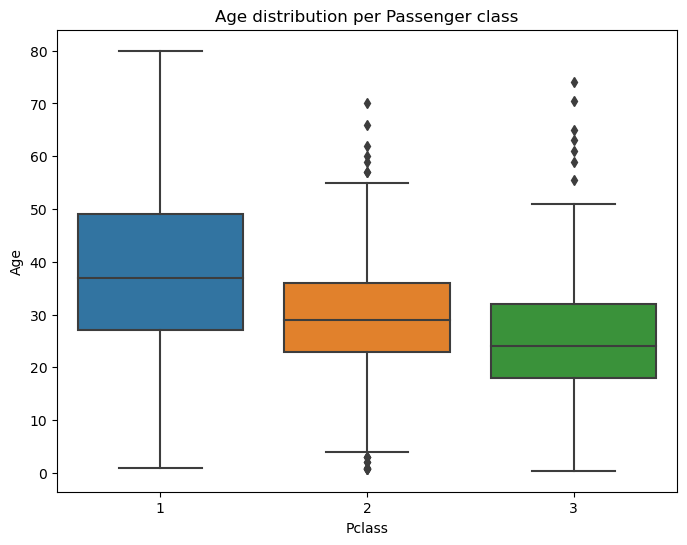

In [9]:
#Question6
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age distribution per Passenger class')
plt.show()

In [10]:
#Question7
df['family'] = df['SibSp'] + df['Parch'] + 1
lf = df[df['family']>2]
lf

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
PassengerId,,,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,3
14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,7
17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,6
...,...,...,...,...,...,...,...,...,...,...,...,...
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,11
870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S,3
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,3


In [11]:
categorical_columns = ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']
chi_square_results = {}

for column in categorical_columns:
    contingency_table = pd.crosstab(df[column], df['Survived'])
    chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)
    chi_square_results[column] = p_val
chi_square_significant = {col: p_val for col, p_val in chi_square_results.items() if p_val < 0.05}
print(chi_square_significant,"\n")

#T-test for continuous vars
continuous_columns = ['Age', 'Fare']
t_test_results = {}

for column in continuous_columns:
    survived = df[df['Survived'] == 1][column]
    not_survived = df[df['Survived'] == 0][column]
    t_stat, p_val = stats.ttest_ind(survived.dropna(), not_survived.dropna())
    t_test_results[column] = p_val
t_test_significant = {col: p_val for col, p_val in t_test_results.items() if p_val < 0.05}
print(t_test_significant,"\n")

{'Pclass': 4.549251711298793e-23, 'Sex': 1.1973570627755645e-58, 'Embarked': 1.769922284120912e-06, 'SibSp': 1.5585810465902147e-06, 'Parch': 9.703526421039997e-05} 

{'Age': 0.03912465401348249, 'Fare': 6.120189341924198e-15} 



In [12]:
survival_gender_class = df.groupby(['Pclass', 'Sex', 'Survived']).size().unstack(fill_value=0)
print(survival_gender_class)

Survived         0   1
Pclass Sex            
1      female    3  91
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47


In [13]:
#Exercise 2

In [14]:
df2 = pd.read_csv('bollywood.csv')
df2

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


In [15]:
#Question1
count = df2['MovieName'].count()
print(count,"\n")

149 



In [16]:
#Question2
genre = df2['Genre'].value_counts()
print(genre,"\n")
sorted = genre.sort_values(ascending=False)

Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: Genre, dtype: int64 



In [17]:
#Question3
print("Most released genre is: ", genre.idxmax(), "\n")

Most released genre is:  Comedy 



In [18]:
#Question4
ct = pd.crosstab(df2['Genre'], df2['ReleaseTime'])
print(ct,"\n")

ReleaseTime  FS  HS  LW   N
Genre                      
 Drama        4   6   1  24
Action        3   3   3  12
Action        0   0   0   3
Comedy        3   5   5  23
Romance       3   3   4  15
Thriller      4   1   1  20
Thriller      0   0   1   2 



In [19]:
#Question5
df2['Month'] = pd.to_datetime(df2['Release Date'], errors='coerce').dt.month
genre_release_time_crosstab = pd.crosstab(df2['Genre'], df2['ReleaseTime'])
most_common_month = df2['Month'].value_counts().idxmax()
print(f"The month with the maximum number of movie releases is: {most_common_month}\n")
print(genre_release_time_crosstab,"\n")

The month with the maximum number of movie releases is: 1

ReleaseTime  FS  HS  LW   N
Genre                      
 Drama        4   6   1  24
Action        3   3   3  12
Action        0   0   0   3
Comedy        3   5   5  23
Romance       3   3   4  15
Thriller      4   1   1  20
Thriller      0   0   1   2 



In [20]:
#Question6
high_budget_movies = df2[df2['Budget'] >= 25]
high_budget_month = high_budget_movies['Month'].value_counts().idxmax()
print(high_budget_month,"\n")

2 



In [21]:
#Quetion7
df2['ROI'] = (df2['BoxOfficeCollection']-df2['Budget'])/df2['Budget']
top_10_roi = df2.nlargest(10, 'ROI')
print("Top 10 movies with maximum ROI:")
print(top_10_roi[['MovieName', 'ROI']], "\n")


Top 10 movies with maximum ROI:
                     MovieName       ROI
64                  Aashiqui 2  8.166667
89                          PK  7.647059
132                Grand Masti  7.514286
135               The Lunchbox  7.500000
87                      Fukrey  6.240000
58                    Mary Kom  5.933333
128                     Shahid  5.666667
37   Humpty Sharma Ki Dulhania  5.500000
101         Bhaag Milkha Bhaag  4.466667
115            Chennai Express  4.266667 



In [22]:
#Question8
average_roi_by_release_time = df2.groupby('ReleaseTime')['ROI'].mean()
print("Average ROI for different release times:")
print(average_roi_by_release_time)

Average ROI for different release times:
ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ROI, dtype: float64


In [23]:
#Question9
correlation_boc_youtube = df2['BoxOfficeCollection'].corr(df2['YoutubeLikes'])
print(f"Correlation between BoxOfficeCollection and YouTube likes: {correlation_boc_youtube}")


Correlation between BoxOfficeCollection and YouTube likes: 0.6825165877731297


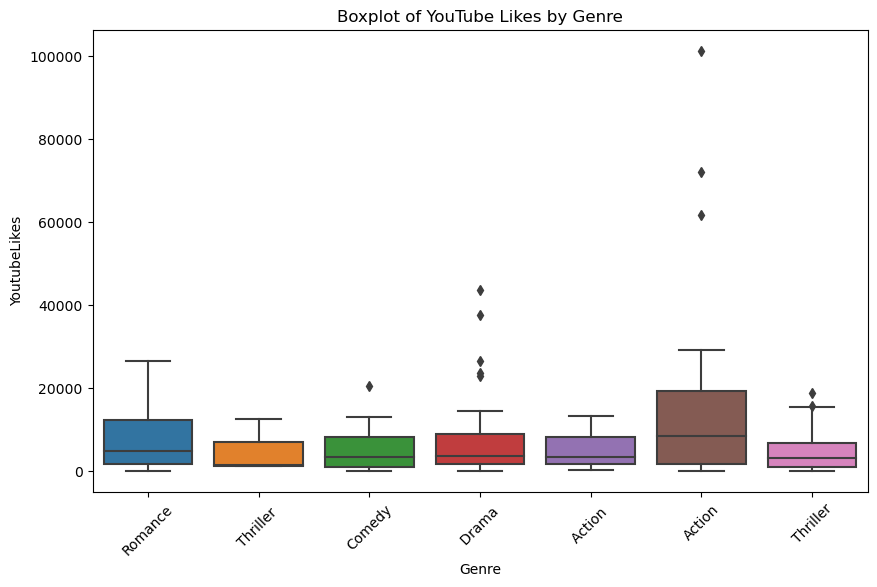

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genre', y='YoutubeLikes', data=df2)
plt.xticks(rotation=45)
plt.title('Boxplot of YouTube Likes by Genre')
plt.show()

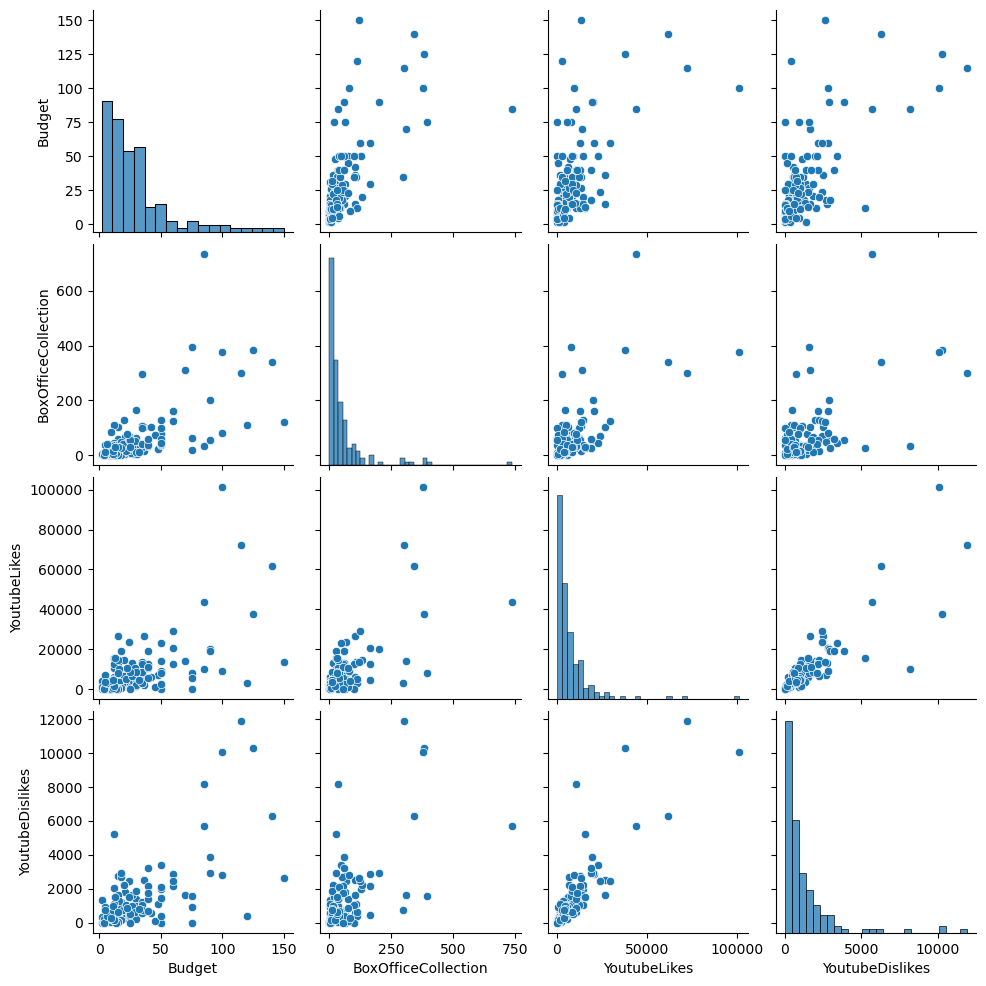

In [25]:
#Question11
sns.pairplot(df2[['Budget', 'BoxOfficeCollection', 'YoutubeLikes', 'YoutubeDislikes']])
plt.show()

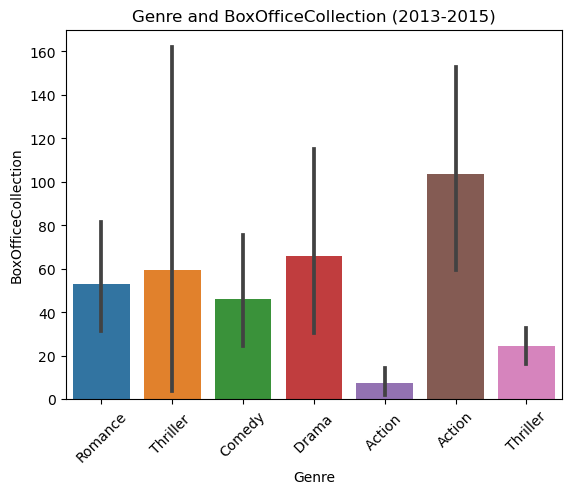

In [26]:
#Question12
df2['ReleaseYear'] = pd.to_datetime(df2['Release Date'], errors='coerce').dt.year
movies_2013_2015 = df2[(df2['ReleaseYear'] >= 2013) & (df2['ReleaseYear'] <= 2015)]
sns.barplot(x='Genre', y='BoxOfficeCollection', data=movies_2013_2015)
plt.xticks(rotation=45)
plt.title('Genre and BoxOfficeCollection (2013-2015)')
plt.show()

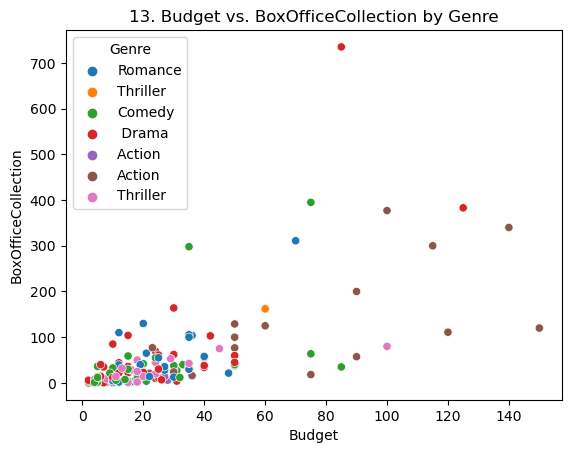

In [27]:
#Question13
sns.scatterplot(x='Budget', y='BoxOfficeCollection', hue='Genre', data=df2)
plt.title('13. Budget vs. BoxOfficeCollection by Genre')
plt.show()

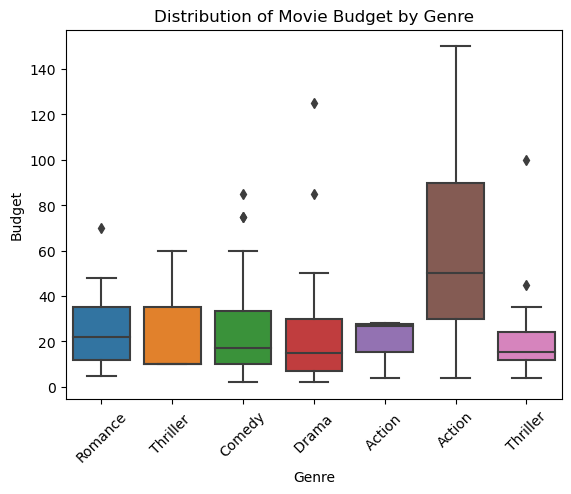

In [28]:
#Question14
sns.boxplot(x='Genre', y='Budget', data=df2)
plt.xticks(rotation=45)
plt.title('Distribution of Movie Budget by Genre')
plt.show()

Number of movies released per year (2013-2015):
2013    67
2014    70
2015    12
Name: ReleaseYear, dtype: int64


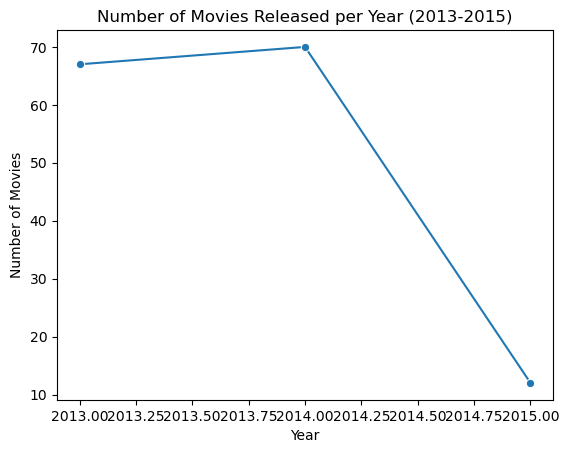

In [29]:
#Question15
movies_per_year = movies_2013_2015['ReleaseYear'].value_counts().sort_index()
print("Number of movies released per year (2013-2015):")
print(movies_per_year)
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values, marker='o')
plt.title('Number of Movies Released per Year (2013-2015)')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()